### ***DESCRIPTION***

---

MNIST DATASET: INCLUDE HANDWRITTEN IMAGES OF NUMBERS 0 TO 9.

TOTAL SAMPLES: 70000

TRAIN SAMPLES: 60000

TEST SAMPLES:  10000

**[OBJECTIVE](https://)**

CLASSIFY IMAGES INTO SPECIFIC CLASS USING SINGLE LAYER PERCEPTRON


### ***QUESTION 01***

---
A. LOAD MNIST DATA FROM KERAS LIBRARY. SPLIT THE SAME AS TRAIN - TEST

B. SCALE THE VALUE 0 TO 1


In [0]:
%tensorflow_version 1.x
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train/255.0
x_test= x_test/255.0

In [0]:
#x_train[0]

### ***QUESTION 02***

---
A. DISPLAY FIRST 25 LABELS FROM TRAINING DATASET AND ALSO DISPLAY LABELS ALONG WITH THEM.


In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


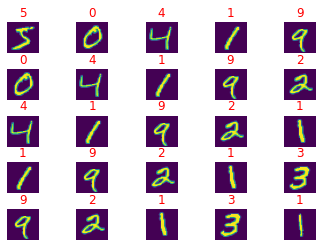

In [0]:
fig, axs = plt.subplots(5,5)
plt.subplots_adjust(hspace=0.5)
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(x_train[i+j], label = str(y_train[i+j]))
        axs[i,j].axis(False)
        axs[i,j].set_title(str(y_train[i+j]), color = 'red')       

### ***QUESTION 03***

---
A. LOAD AND RESHAPE THE DATA.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
#Normalize
x_train = x_train/255.0
x_test =  x_test/255.0

In [0]:
print('ORIGINAL SHAPE OF THE DATA: ', x_train.shape)
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
print('AFTER RESHAPING THE DATA: ', x_train.shape) 

ORIGINAL SHAPE OF THE DATA:  (60000, 28, 28)
AFTER RESHAPING THE DATA:  (60000, 784)


B. PRINT LABEL OF FIRST IMAGE BEFORE AND AFTER CONVERTING TO THE CATEGORICAL

In [0]:
print('ORIGINAL FIRST LABEL: ', y_train[0])
y_train= tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)
print('FIRST LABEL AFTER CATEGORICAL: ', y_train[0])

ORIGINAL FIRST LABEL:  5
FIRST LABEL AFTER CATEGORICAL:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### ***QUESTION 04***

---
A. BUILD BASIC SINGLE LAYER PERCEPTRON ON THE MNIST DATA.

1. Single Dense 1024 Neurons
2. Input Shape Being 784 Activation Function Relu.
3. Softmax Layer With 10 Neuron As Output


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, Activation

In [0]:
slp_model = Sequential()
slp_model.add(InputLayer(input_shape= [784]))
slp_model.add(Dense(1024,activation= 'relu'))
slp_model.add(Dense(10, activation= 'softmax'))
slp_model.summary() 




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


4. Loss- Categorical_Crossentropy
5. Optimizer - RMSPROP

In [0]:
slp_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
              metrics = ['accuracy']) 

6. Batch_Size = 5000, Epochs=50


In [0]:
slp_model.fit(x_train, y_train, batch_size = 5000, 
          epochs = 50, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 4s 74us/step - loss: 0.9796 - acc: 0.7033 - val_loss: 0.5281 - val_acc: 0.8326
Epoch 2/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.4384 - acc: 0.8733 - val_loss: 0.3811 - val_acc: 0.8819
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.3476 - acc: 0.9001 - val_loss: 0.3255 - val_acc: 0.9047
Epoch 4/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2989 - acc: 0.9126 - val_loss: 0.2485 - val_acc: 0.9289
Epoch 5/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2546 - acc: 0.9276 - val_loss: 0.2262 - val_acc: 0.9350
Epoch 6/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2282 - acc: 0.9342 - val_loss: 0.2093 - val_acc: 0.9379
Epoch 7/50
60000/60000 [==

In [0]:
slp_model.save('slp.h5')

10. PRINT ACCURACY AND LOSS OF SLP MODEL

In [0]:
loss, accuracy = slp_model.evaluate(x_test, y_test, verbose= 0)
print('Test Loss: ', loss)
print('Test Accuracy: ', accuracy)

Test Loss:  0.06029947560108267
Test Accuracy:  0.9816


### ***QUESTION 05***

---
1. Single dense layer 1024 neurons
input shape being 784 activation function relu.
2. Second Dense Layer 512 neurons and activation relu
3. Third Dense Layer 512 Neurons and activation relu
4. Softmax layer with 10 neurons as output

In [0]:
mlp_model = Sequential()
mlp_model.add(InputLayer(input_shape= [784]))
mlp_model.add(Dense(1024,activation= 'relu')) #first dense layer
mlp_model.add(Dense(512,activation= 'relu'))#second dense layer
mlp_model.add(Dense(512,activation= 'relu'))#third dense layer
mlp_model.add(Dense(10, activation= 'softmax'))
mlp_model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,596,426
Trainable params: 1,596,426
Non-trainable params: 0
_________________________________________________________________


5. loss- categorical_crossentropy
6. optimizer - adam

In [0]:
mlp_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

7. batch_size = 5000, epochs=50
8. Print the accuracy and loss of MLP model

In [0]:
mlp_model.fit(x_train, y_train, batch_size = 5000, 
          epochs = 50, validation_data = (x_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.9516 - acc: 0.7424 - val_loss: 0.3818 - val_acc: 0.8910
Epoch 2/50
60000/60000 [==============================] - 9s 150us/step - loss: 0.3105 - acc: 0.9113 - val_loss: 0.2370 - val_acc: 0.9310
Epoch 3/50
60000/60000 [==============================] - 9s 150us/step - loss: 0.2089 - acc: 0.9403 - val_loss: 0.1760 - val_acc: 0.9467
Epoch 4/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.1567 - acc: 0.9543 - val_loss: 0.1398 - val_acc: 0.9584
Epoch 5/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.1225 - acc: 0.9647 - val_loss: 0.1212 - val_acc: 0.9637
Epoch 6/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0986 - acc: 0.9714 - val_loss: 0.1011 - val_acc: 0.9689
Epoch 7/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.0782 - acc: 0.9775 - val_loss: 0.0911 - 

In [0]:
loss, accuracy = mlp_model.evaluate(x_test, y_test, verbose= 0)
print('Test Loss: ', loss)
print('Test Accuracy: ', accuracy) 

Test Loss:  0.08082253013303284
Test Accuracy:  0.9814


In [0]:
mlp_model.save('mlp.h5') 

### ***Question 6:***

---


A. Build basic Convolution neural network on the MNIST Data. 

Reshape the Data: 

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print('ORIGINAL SHAPE: ', x_train.shape)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1)) 
print('AFTER RE-SHAPE: ', x_train.shape)

ORIGINAL SHAPE:  (60000, 28, 28)
AFTER RE-SHAPE:  (60000, 28, 28, 1)


In [0]:
#normalise
x_train = x_train/255.0
x_test =  x_test/255.0

In [0]:
#Categorical
y_train= tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10) 

1. Conv2D with 32 Neuron; Filter 3,3 ; Activation: Relu ; Stride
(1,1)
2. MaxPool2D ; Pool Size (2,2)
3. Flatten the data again to send to desne layer
4. 128 Neuron single Dense Layer with relu
5. 10 neuron single dense layer with softmax as output layer

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer

In [0]:
conv_model = Sequential()
conv_model.add(InputLayer(input_shape = [28,28,1]))
conv_model.add(Conv2D(filters= 32, kernel_size= (3,3), strides= (1,1), padding= 'same', activation= 'relu'))
conv_model.add(MaxPool2D(pool_size= (2,2)))
conv_model.add(Flatten())
conv_model.add(Dense(128, activation = 'relu'))
conv_model.add(Dense(10, activation= 'softmax'))
conv_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
              metrics = ['accuracy']) 

In [0]:
conv_model.fit(x_train, y_train, batch_size = 5000, 
          epochs = 50, validation_data = (x_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 26s 433us/sample - loss: 1.1890 - acc: 0.6556 - val_loss: 0.5615 - val_acc: 0.8492
Epoch 2/50
60000/60000 [==============================] - 24s 407us/sample - loss: 0.5008 - acc: 0.8538 - val_loss: 0.3986 - val_acc: 0.8879
Epoch 3/50
60000/60000 [==============================] - 24s 408us/sample - loss: 0.3720 - acc: 0.8894 - val_loss: 0.3581 - val_acc: 0.8923
Epoch 4/50
60000/60000 [==============================] - 24s 406us/sample - loss: 0.3004 - acc: 0.9117 - val_loss: 0.3321 - val_acc: 0.8869
Epoch 5/50
60000/60000 [==============================] - 24s 408us/sample - loss: 0.2710 - acc: 0.9186 - val_loss: 0.3272 - val_acc: 0.8979
Epoch 6/50
60000/60000 [==============================] - 24s 407us/sample - loss: 0.2274 - acc: 0.9326 - val_loss: 0.2315 - val_acc: 0.9302
Epoch 7/50
60000/60000 [==============================] - 24s 406us/sample - loss: 0.2155 - acc: 0.9352 

SAVE THE MODEL AS .json, .h5

In [0]:
from tensorflow.keras.models import model_from_json

model_json = conv_model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

conv_model.save_weights('model.h5')

In [0]:
conv_model.save('conv_model.h5')

LOAD THE MODEL

In [0]:
json_file = open('model.json', 'r')
loaded_model_json= json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('model.h5')
loaded_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

LOSS AND ACCURACY

In [0]:
loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', loss)
print('Test Accuracy: ', accuracy) 

Test Loss:  0.06279286134364083
Test Accuracy:  0.9805


### ***Hence for MNIST Dataset even simple MLP is effective***